# Queueing theory - M/M/1 reworked code

### 1. Imports

In [1]:
import openqtsim

### 2. Prepare inputs

In [2]:
# Define the queue object input
t_scale = 60 # min
Lambda = 8
Mu = 9
A = openqtsim.ArrivalProcess("M", arr_rate=Lambda, t_scale=t_scale)
S = openqtsim.ServiceProcess("M", srv_rate=Mu, t_scale=t_scale)
c = 1

# Create the queue object and use it to create a simulating object
q = openqtsim.Queue(A, S, c)
sim = openqtsim.Simulation(q, t_scale=t_scale, seed=1)

### 3. Run the simulation

In [3]:
%%time
print('Start simulation of "{}" queue'.format(q.kendall_notation))
print('')

# set stop limits - simulation stops either when max arrivals is reached or the tolerance limit is achieved
tol = 0.0001
max_arr = 50000

# run simulation
sim.run(max_arr=max_arr, IAT_tol=tol, ST_tol=tol) 

Start simulation of "M/M/1/inf/inf/FIFO" queue

Nr of customers: 10777
Accuracy IAT: 9.51939956864295e-05
Tolerance: 0.0001
Accuracy ST: 9.643113860523245e-05
Tolerance: 0.0001

Wall time: 16.8 s


### 4. Analyse and visualise results

#### Get statistics

In [4]:
print('--- input statistics --------')
print("aver_IAT_in_secs: {:.4f} [hour]".format(1/Lambda))
print("aver_ST_in_secs: {:.4f} [hour]".format(1/Mu))
print('')

print('--- simulation statistics ---')
sim.get_stats()

--- input statistics --------
aver_IAT_in_secs: 0.1250 [hour]
aver_ST_in_secs: 0.1111 [hour]

--- simulation statistics ---
Average IAT: 0.1249 [hours]
Average ST: 0.1112 [hours]
Rho: System utilisation: 0.8902

Total number of customers: 10777.00

W_s: Average time spent in the system: 0.85 [hours]
W_q: Average time spent in the queue: 0.74 [hours]

Total waiting time: 7957.1540 [hours]
Average waiting time of all customers: 0.74 [hours]
Average waiting time of customers that waited: 0.83 [hours]

Probability of idle server (nobody in the system): 0.1098
Probability that somebody is waiting: 0.8917
Probability that nobody is waiting: 0.1083
Probability that 1 person is waiting: 0.1051
Probability that 2 persons are waiting: 0.0886
Probability that 3 persons are waiting: 0.0766
Probability that 9 persons are waiting (10 in system): 0.0423

Average waiting time as a fraction of ST: 6.64



**Analytical solution: M_M_1_inf_inf_FIFO**

    arrival rate: 8.0000 per hour
    service rate: 9.0000 per hour
    rho: 0.8889

    P_0: probability that there are 0 customers in the system = 0.1111
    P_1: probability of 1 customers in the system = 0.0988
    P_10: probability of 10 customers in the system = 0.0342

    no_q: probability that there is nobody in the queue (P_0+P_1) = 0.2099
    util_sys: system utilisation rate  (P_(n>=1)) = 0.8889
    util_ser: server utilisation rate (P_(n>=2)) = 0.7901

    L_s: the long term average number of customers present in the system = 8.0000
    L_q: the long term average number of customers present in the queue = 7.1111
    W_s: the long term average time spent in the system = 1.0000 hour (= 60.0 minutes)
    W_q: the long term average waiting time in the queue = 0.8889 hour (= 53.3 minutes)

#### Return log

In [5]:
sim.return_log()
# c = customer
# IAT = inter arrival time
# ST = service time
# AT = arrival time
# TSB = time service begins
# TSE = time service ends
# TCSS = time customer spends in the system
# TCWQ = time customer waits in the queue
# ITS = idle time of the server
# QL = queue length

,c_id,IAT,ST,AT,TSB,TSE,TCSS,TCWQ,ITS,QL
0,1,4.047044,0.000763,4.047044,4.047044,4.047806,0.000762,0.000000,4.047044,0
1,2,9.555939,1.058064,13.602983,13.602983,14.661047,1.058064,0.000000,9.555177,0
2,3,2.700096,1.374098,16.303079,16.303079,17.677176,1.374098,0.000000,1.642032,1
3,4,0.726629,3.369684,17.029708,17.677176,21.046860,4.017152,0.647469,0.000000,1
4,5,3.179824,3.622262,20.209532,21.046860,24.669122,4.459591,0.837328,0.000000,0
5,6,5.804698,1.524829,26.014230,26.014230,27.539059,1.524829,0.000000,1.345107,0
6,7,8.669098,0.185131,34.683328,34.683328,34.868459,0.185131,0.000000,7.144269,0
7,8,15.785230,3.600607,50.468557,50.468557,54.069164,3.600607,0.000000,15.600099,0
8,9,8.325602,1.008486,58.794160,58.794160,59.802646,1.008486,0.000000,4.724996,0
9,10,6.135055,10.754451,64.929215,64.929215,75.683666,10.754451,0.000000,5.126569,1


In [6]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

fig.suptitle('Overview of stochastic variables')
ax1.hist(sim.log["IAT"],1000); ax1.set_title('IAT');
ax2.hist(sim.log["ST"],1000); ax2.set_title('ST');

## Sandbox

In [21]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(1)
scale = t_scale
a = stats.expon(scale=scale)


In [22]:
len(sim.log["IAT"])

10777

In [23]:
data = []
for i in range(len(sim.log["IAT"])):
    data.append(a.rvs())
# plt.plot(data, 'o')

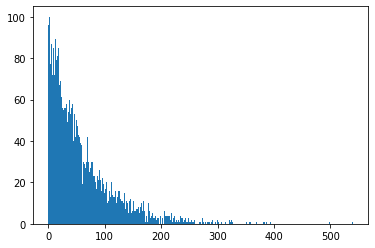

In [24]:
plt.hist(data, 1000);

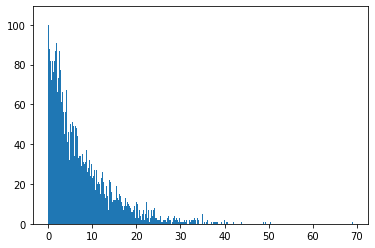

In [25]:
plt.hist(sim.log["IAT"],1000);

In [26]:
print(np.mean(data))
print(np.mean(sim.log["IAT"]))

59.34741635801215
7.494714030708621
